In [1]:
import pandas as pd 
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.patches as patches
import matplotlib.patches as patches
import matplotlib.pyplot as plt 
import seaborn as sns
import umap
import math
%matplotlib inline

## Load DNABERT-2 embeddings

Embeddings needs to be downloaded into dataframe which is visualised utilising UMAP 

In [2]:
import sys 
sys.path.insert(0, '/csc/epitkane/projects/multimodal/src/')

In [3]:
from utils import list_files_in_dir

In [ ]:
paths = []
paths = list_files_in_dir('/csc/epitkane/projects/multimodal/data/temp/motif3', paths)

In [ ]:
filtered_paths = [i for i in paths if i[-3:] == 'npz' ]

In [ ]:
filtered_paths[0]

In [ ]:
size = 0
for path in tqdm(filtered_paths):
    tumour =  path.split('/')[8]
    #if tumour in utilised_tumours:
    #    continue 
    #elif len(utilised_tumours) == 24:
    #    break
    #else:
        #utilised_tumours.append(tumour)
    embeddings = np.load(path)['motif']
    size += embeddings.size*embeddings.itemsize
        #embeddings = [i for i in np.load(path)['motif']]
        #df = pd.DataFrame(embeddings)
        #df['tumour_class'] = [tumour for i in range(len(embeddings))]
        #data = pd.concat([data, df], axis=0, igchangenore_index=True)
print(size)

Numpy array needs 270, 432 491 520 GB

Since data won't fit let's reduce the dimensions with PCA. PCA is done using src/UMAP.py module

### Analysis of PCA

In [5]:
from sklearn.decomposition import IncrementalPCA
from tqdm.notebook import tqdm
import pickle

In [6]:
import pickle
import os
from tqdm.notebook import tqdm

In [ ]:
with open("/csc/epitkane/projects/multimodal/UMAP/IPCA_DNABERT_motif3.pkl",'rb') as f:
    IPCA3 = pickle.load(f)

In [ ]:
plt.plot(np.cumsum(IPCA3.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
(np.cumsum(IPCA3.explained_variance_ratio_) <= 0.95).sum()

In [ ]:
paths = []
paths = list_files_in_dir('/csc/epitkane/projects/multimodal/data/train/motif3', paths)
paths = [i for i in paths if i[-2:] !='gz']

In [ ]:
base = "/csc/epitkane/projects/multimodal/data"
for i, path in enumerate(tqdm(paths)):
    data = np.load(path)['motif']
    transformed = IPCA3.transform(data)
    transformed = transformed[:,:10]
    file = os.path.join(base, 'PCA_motif3', path.split('/')[-3], path.split('/')[-2] )
    if not os.path.exists(file):
        os.makedirs(file, exist_ok=True)
    file = os.path.join(file, path.split('/')[-1])    
    np.save(file, transformed, allow_pickle=True)
    #print(f'{file} saved')

In [ ]:
with open("/csc/epitkane/projects/multimodal/UMAP/IPCA_DNABERT_motif201.pkl",'rb') as f:
    IPCA101 = pickle.load(f)

In [ ]:
plt.plot(np.cumsum(IPCA101.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
(np.cumsum(IPCA101.explained_variance_ratio_) <= 0.95).sum()

In [ ]:
paths = []
paths = list_files_in_dir('/csc/epitkane/projects/multimodal/data/train/DNABERT_motif101', paths)
paths = [i for i in paths if i[-2:] !='gz']

In [ ]:
base = "/csc/epitkane/projects/multimodal/data"
for i, path in enumerate(tqdm(paths)):
    if i < 6989:
        continue
    data = np.load(path)['motif']
    transformed = IPCA101.transform(data)
    transformed = transformed[:,:812]
    file = os.path.join(base, 'PCA_motif101', path.split('/')[-3], path.split('/')[-2] )
    if not os.path.exists(file):
        os.makedirs(file, exist_ok=True)
    file = os.path.join(file, path.split('/')[-1])    
    np.save(file, transformed, allow_pickle=True)
    #print(f'{file} saved')

## UMAP

In [6]:
paths = []
paths = list_files_in_dir('/csc/epitkane/projects/multimodal/data/PCA_motif3', paths)

KeyboardInterrupt: 

In [ ]:
data = np.array([])
data = data.reshape([0, 10])
label = []
for path in tqdm(paths):
    tumour = path.split('/')[-3]
    embeddings = np.load(path)
    if len(embeddings) < 200:
        size = len(embeddings)
    else:
        size = 200
    idx = np.random.choice(len(embeddings), size = size, replace=False)
    embeddings = embeddings[idx,:]
    label.extend([tumour for i in range(size)])
    data = np.concatenate([data, embeddings], axis=0)

In [ ]:
df = pd.DataFrame(data= data)
df['labels'] = label
df.to_csv('PCA3_df_150_each_file.csv.gz', compression='gzip')

In [ ]:
df = pd.read_csv('/csc/epitkane/projects/multimodal/UMAP/df_train_data_PCA_motif3_UMAP_30_samples_each_file.tsv.gz', index_col= 0, sep='\t', compression='gzip')

In [ ]:
df.loc[:, :'9']


In [ ]:
reducer = umap.UMAP( verbose=True)

In [ ]:
reducer.fit(df.loc[:,:'9'])
with open('UMAP_motif3_30_each_file.pkl','wb') as f:
    pickle.dump(reducer,f)

## Visualisation

In [7]:
model = '/csc/epitkane/projects/multimodal/UMAP/UMAP_motif101_30_each_file.pkl'
#model = '/csc/epitkane/projects/multimodal/UMAP/UMAP_motif101_30_each_file.pkl'
with open(model,'rb') as f:
    reducer = pickle.load(f)

Wed Feb 19 01:37:10 2025 Building and compiling search function


In [8]:
data_path = '/csc/epitkane/projects/multimodal/UMAP/df_train_data_PCA_motif101_UMAP_30_samples_each_file.tsv.gz'
#data_path = '/csc/epitkane/projects/multimodal/UMAP/df_train_data_PCA_motif101_UMAP_30_samples_each_file.tsv.gz'
df = pd.read_csv(data_path, index_col= 0, sep='\t', compression='gzip')

In [9]:
df

,0,1,2,3,4,5,6,7,8,9,...,809,810,811,labels,seq,ref,pos,chr,mut_type,sample
0,0.934397,0.362796,0.667070,0.422307,-0.054825,0.263865,0.118462,0.424327,0.572963,0.271762,...,0.003417,-0.000697,0.000231,Bone-Osteosarc,TTATTTGTTTTTCTGTTATTGAGTTGTGTAAATCTTTTAATATATT...,TTATTTGTTTTTCTGTTATTGAGTTGTGTAAATCTTTTAATATATT...,48852594,2,indel,f856fa85-fdb8-c0b0-e040-11ac0d480b4e
1,-0.298641,-0.526578,0.458406,0.266014,0.234596,-0.324199,-0.293043,0.459465,-0.390985,0.018993,...,0.001155,0.000008,0.000412,Bone-Osteosarc,AGACTCTCTCTCCATTAAAAAAAAAATGAAAATTAAAATAAAAACC...,AGACTCTCTCTCCATTAAAAAAAAAATGAAAATTAAAATAAAAACC...,52669911,2,indel,f856fa85-fdb8-c0b0-e040-11ac0d480b4e
2,-0.389070,-0.090033,0.362627,-0.185637,0.435617,0.218377,0.108312,-0.211987,-0.041929,-0.059611,...,0.000020,0.001531,0.001083,Bone-Osteosarc,CCAATCTAAAACACAATAACACATTTTTCAAATCATTTTGTCATAT...,CCAATCTAAAACACAATAACACATTTTTCAAATCATTTTGTCATAT...,221802365,2,indel,f856fa85-fdb8-c0b0-e040-11ac0d480b4e
3,-0.089914,0.253001,-0.172873,0.308093,0.183097,-0.483116,0.262430,-0.000671,-0.007120,-0.089337,...,0.001771,-0.001060,0.000761,Bone-Osteosarc,TTTTCAGCCCTCGAGTTGGGATTCTTGGAGGAGGGGGGGGGGTGCA...,TTTTCAGCCCTCGAGTTGGGATTCTTGGAGGAGGGGGGGGGGTGCA...,73457758,3,indel,f856fa85-fdb8-c0b0-e040-11ac0d480b4e
4,1.804980,-0.288137,0.442704,-0.065228,0.075225,-0.599775,-0.105218,0.092421,-0.250218,0.189094,...,0.004210,0.000554,-0.000195,Bone-Osteosarc,CATTTGTTGGCTGATGGGTATTTAGAAGATATACAGACAATAATCA...,CATTTGTTGGCTGATGGGTATTTAGAAGATATACAGACAATAATCA...,188128955,3,indel,f856fa85-fdb8-c0b0-e040-11ac0d480b4e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212210,0.503990,0.428464,-0.086613,0.347037,0.531476,-0.048904,0.024938,-0.028693,-0.005767,-0.043145,...,0.003465,0.001088,0.002429,Uterus-AdenoCA,GAATGAATGAATTCATACATGCATGCATGAATGAATGGTGTATTAG...,GAATGAATGAATTCATACATGCATGCATGAATGAATGGTGTATTAG...,17822375,X,MNV,31bc44b9-35ff-43fd-8a01-a834f3b1ce46
212211,0.478628,0.445075,-0.821596,-0.550689,0.589773,-0.185789,0.111414,0.598893,0.344223,0.096335,...,0.003437,0.001600,-0.000488,Uterus-AdenoCA,GTAGATGGAATGGAGGCTGGGTGTGGTGGCTCATACCTGTAATCCC...,GTAGATGGAATGGAGGCTGGGTGTGGTGGCTCATGCCTGTAATCCC...,19577140,X,MNV,31bc44b9-35ff-43fd-8a01-a834f3b1ce46
212212,-1.553899,-0.128898,-0.274782,-0.679874,0.330397,-0.011055,0.046261,0.017810,-0.237083,-0.000213,...,0.002242,-0.000914,0.000139,Uterus-AdenoCA,TTCTGAATGAAGAACTAAACGTGGAAGGGAAAAACTGGTACATGCC...,TTCTGAATGAAGAACTAAACGTGGAAGGGAAAAACTGGTACATGCC...,95471550,X,MNV,31bc44b9-35ff-43fd-8a01-a834f3b1ce46
212213,1.660791,-1.014034,0.210483,0.271446,-0.617905,0.630183,0.352811,-0.334510,0.332650,0.472524,...,0.005229,0.000545,-0.000830,Uterus-AdenoCA,ATGGCCATTTTCACGATATTGATTCTTCCTACCCACGAGCATGGAA...,ATGGCCATTTTCACGATATTGATTCTTCCTACCCACGAGCATGGAA...,151227608,X,MNV,31bc44b9-35ff-43fd-8a01-a834f3b1ce46


In [10]:
df = df.sample(frac=1, random_state=42)
df

,0,1,2,3,4,5,6,7,8,9,...,809,810,811,labels,seq,ref,pos,chr,mut_type,sample
194602,-0.052249,-0.134602,0.320991,-0.284961,0.431916,0.203296,-0.280299,0.053368,0.081823,0.029657,...,0.000124,0.000443,0.002167,Kidney-RCC,AAAGCAACTAATTCTCAAATAATTGAATTTAAAACATGCGCATGTA...,AAAGCAACTAATTCTCAAATAATTGAATTTAAAACATGCGCATGTA...,26788264,21,indel,33b7e799-ad10-498f-9948-8ce433311539
15156,0.244515,-0.144511,0.129483,0.208562,-0.331104,0.236840,0.107209,0.130337,0.075466,-0.006108,...,-0.001118,0.000231,-0.001176,Liver-HCC,TCTTTCTTCCTTTTCCATCTGTATGGTTTCATTTCTTTTTCTTACC...,TCTTTCTTCCTTTTCCATCTGTATGGTTTCATTTCTTTTTCTTACC...,6988413,20,MNV,d3ad5b5a-c622-11e3-bf01-24c6515278c0
92368,0.169649,-0.200240,-1.040092,-0.311853,-0.544028,0.199889,-0.491090,-0.614381,-0.045447,-0.240969,...,-0.000216,-0.002312,0.001320,Breast-AdenoCA,CCTACACCCACCCTTGTCCCGCACCAAACCCTCACCTGCATCCTCA...,CCTACACCCACCCTTGTCCCGCACCAAACCCTCACCTGCATCCTCA...,103891119,3,SNV,fc8130e0-0dcf-b558-e040-11ac0c483285
148879,0.304450,-0.420975,-0.509069,-0.227756,0.100683,-0.560065,-0.200862,0.142913,-0.082352,-0.395532,...,-0.000871,-0.002739,0.001710,Panc-Endocrine,TGAGGAGGCAGCACAGCCTCAGGAAGCTGAAAACACCCCTGGCCAA...,TGAGGAGGCAGCACAGCCTCAGGAAGCTGAAAACACCCCTGGCCAA...,56744194,20,SNV,6e776415-ddf4-4060-953f-08ef22441234
117186,-0.524414,0.389388,0.127814,-0.110401,0.182650,0.081549,-0.143280,-0.205842,0.190414,0.311012,...,0.002240,0.000495,-0.000367,Panc-AdenoCA,AAGAACTCTGAGGATTTAGGCCACTAAAATCTTTGACCCTCATGTT...,AAGAACTCTGAGGATTTAGGCCACTAAAATCTTTGACCCTCATGTT...,179686287,2,MNV,ca284012-bd06-47a3-8a9d-c6b185d87d85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,-1.288311,-0.364532,0.517384,0.097921,-0.316751,0.104183,0.107577,0.487055,-0.076295,0.227980,...,0.053486,-0.048882,-0.027791,Panc-AdenoCA,ATTTTTTCATGATTTCAGGGTTATTTGTACACATTATTTGGGGAAA...,ATTTTTTCATGATTTCAGGGTTATTTGTACACATTATTTGGGGAAA...,67328133,6,SNV,1a0ef226-41a5-4b56-9078-4b7834f0c976
103694,0.096134,0.113663,0.163533,0.018107,0.100401,-0.566429,-0.077531,0.143341,0.281098,-0.009461,...,0.017404,0.018697,0.016659,Skin-Melanoma,ATCAAGAGTTCTGTTTTGGATGAGCTCAGTTTGACATGCATATTAG...,ATCAAGAGTTCTGTTTTGGATGAGCTCAGTTTGACATGCATATTAG...,106293125,X,SNV,897ba508-d74b-46bf-8554-1210a66a36d1
131932,-0.976341,0.289749,-0.315316,-0.326736,-0.124863,0.204644,0.582559,-0.445033,-0.308922,0.173629,...,0.000934,0.000906,-0.000743,CNS-GBM,ATATCTTTCAGCAATCATGAGCCTGCCAAAGTGCATCTTTAGTACG...,ATATCTTTCAGCAATCATGAGCCTGCCAAAGTGCATCTTTAGTACG...,144417364,7,SNV,2c71d542-1653-4d97-8752-f2fd05c7e75d
146867,-0.655461,0.164582,0.249804,-0.629263,-0.196906,0.061074,0.063722,-0.595603,-0.573401,0.152521,...,-0.003768,-0.051465,-0.000479,Lung-AdenoCA,ACTAAGAGGTAGGGAATTATCATGCTTTTGAAATTACAGGTCCTTT...,ACTAAGAGGTAGGGAATTATCATGCTTTTGAAATTACAGGTCCTTT...,21853955,6,SNV,37d0cf1b-1743-4852-8073-372b16b5c17d


In [ ]:
embedding = reducer.transform(df.loc[:,:'811'])

In [78]:
embedding.shape

(212215, 2)

In [79]:
cancer = pd.read_csv('/csc/epitkane/projects/multimodal/data/utils/classinfo_pcawg_.csv', index_col=0)

In [80]:
tumour_types = pd.DataFrame(df.loc[:,'labels'])

In [81]:
result = tumour_types.merge(cancer, left_on='labels', right_on='class_name', how='left')

In [82]:
result

,labels,class_name,class_index,n_samples
0,Kidney-RCC,Kidney-RCC,9,144
1,Liver-HCC,Liver-HCC,10,326
2,Breast-AdenoCA,Breast-AdenoCA,1,198
3,Panc-Endocrine,Panc-Endocrine,18,85
4,Panc-AdenoCA,Panc-AdenoCA,17,241
...,...,...,...,...
212210,Panc-AdenoCA,Panc-AdenoCA,17,241
212211,Skin-Melanoma,Skin-Melanoma,20,107
212212,CNS-GBM,CNS-GBM,2,41
212213,Lung-AdenoCA,Lung-AdenoCA,11,38


In [83]:
label = {'SNV': 0, 'MNV': 1, 'indel': 2}
mut_types = df.loc[:, 'mut_type'].map(label)

In [84]:
mut_types

194602    0
15156     2
92368     0
148879    0
117186    1
         ..
119879    0
103694    0
131932    0
146867    0
121958    0
Name: mut_type, Length: 212215, dtype: int64

In [85]:
chrom_label = []
chrom = df.loc[:,'chr'].values.tolist()
for i in chrom:
    if i != 'X' and i != 'Y':
        chrom_label.append(int(i))
    else:
        if i == 'X':
            chrom_label.append(23)
        if i =='Y':
            chrom_label.append(24)

In [86]:
chroms_base = [f'chrom {i}' for i in range(1, 23)]

In [87]:
chroms_base.append('chrom X')
chroms_base.append('chrom Y')

In [88]:
chroms_base

['chrom 1',
 'chrom 2',
 'chrom 3',
 'chrom 4',
 'chrom 5',
 'chrom 6',
 'chrom 7',
 'chrom 8',
 'chrom 9',
 'chrom 10',
 'chrom 11',
 'chrom 12',
 'chrom 13',
 'chrom 14',
 'chrom 15',
 'chrom 16',
 'chrom 17',
 'chrom 18',
 'chrom 19',
 'chrom 20',
 'chrom 21',
 'chrom 22',
 'chrom X',
 'chrom Y']

In [89]:
ref_middle_base = df.loc[:, 'ref']

In [90]:
ref_middle_base = ref_middle_base.apply(lambda x: x[math.floor(len(x)/2)])

In [91]:
label = {'A': 0, 'T': 1, 'C': 2, 'G':3, '-':4}

In [92]:
middle_base = ref_middle_base.map(label)

In [93]:
middle_base

194602    1
15156     0
92368     2
148879    2
117186    3
         ..
119879    2
103694    2
131932    2
146867    2
121958    2
Name: ref, Length: 212215, dtype: int64

In [94]:
ref_middle_base.iloc[3]

'C'

In [ ]:
import sys
!{sys.executable} -m pip install datashader holoviews colorcet

In [ ]:
import umap.plot

In [ ]:
umap.plot.points(reducer, labels=result.loc[:,'class_index'])

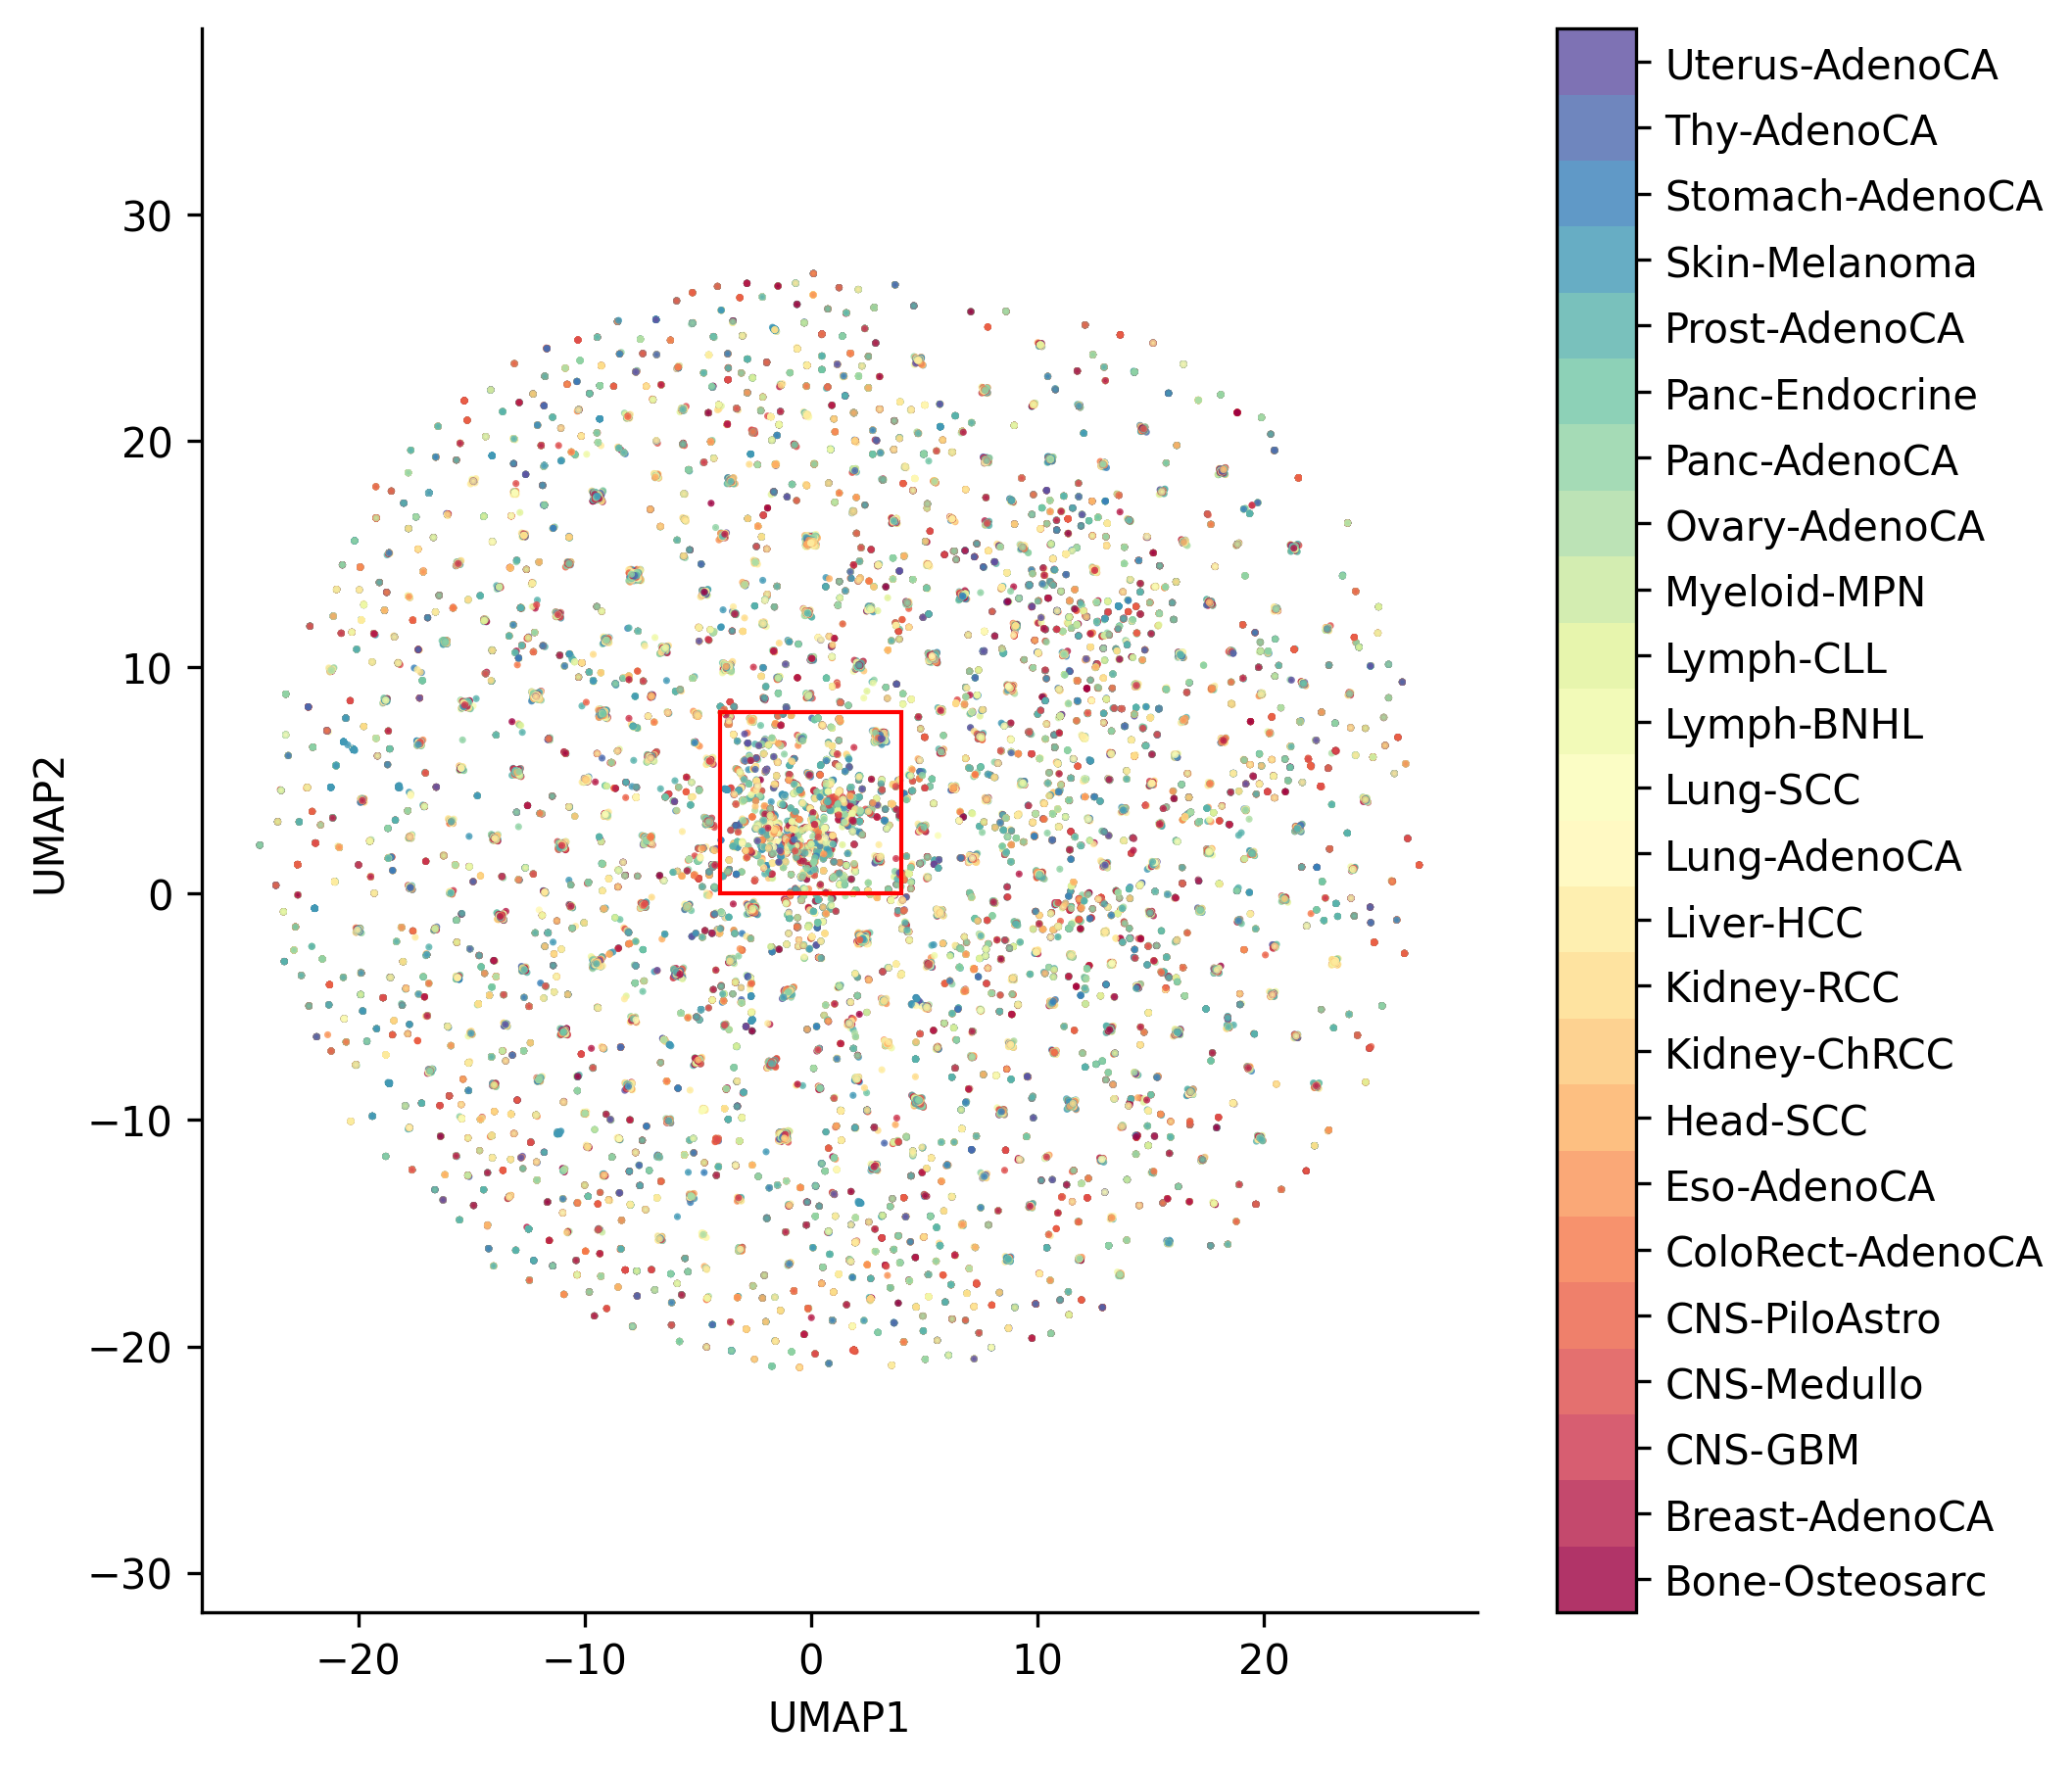

In [113]:
fig = plt.figure(figsize=(7,7), dpi=300)
ax = plt.subplot()
#plt.axes().set_facecolor("black")
plt.scatter(embedding[:, 0], embedding[:, 1], c=result.loc[:,'class_index'], cmap='Spectral', s=0.5, alpha=0.8)
plt.gca().set_aspect('equal', 'datalim')
cbar = plt.colorbar(boundaries=np.arange(25)-0.5, ticks = range(24)) # horizontal colorbar
cbar.ax.set_yticklabels(cancer.loc[:, 'class_name'].values.tolist())
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel('UMAP2')
plt.xlabel('UMAP1')

rect = patches.Rectangle((-4, 0), 8, 8, linewidth=1, edgecolor='r', facecolor='none')
plt.gca().add_patch(rect)
plt.savefig('../figures/data_UMAP/UMAP_motif3_tumour_type_212215_mutations_final_with_mark.png', format="png",bbox_inches='tight')
plt.show()

In [110]:
(((embedding[:,0] > -4) & (embedding[:,0] > 4)) & ((embedding[:,1] > 0) & (embedding[:,1] > 8))).sum()

31867

In [111]:
36411/embedding.shape[0]

0.1715759960417501

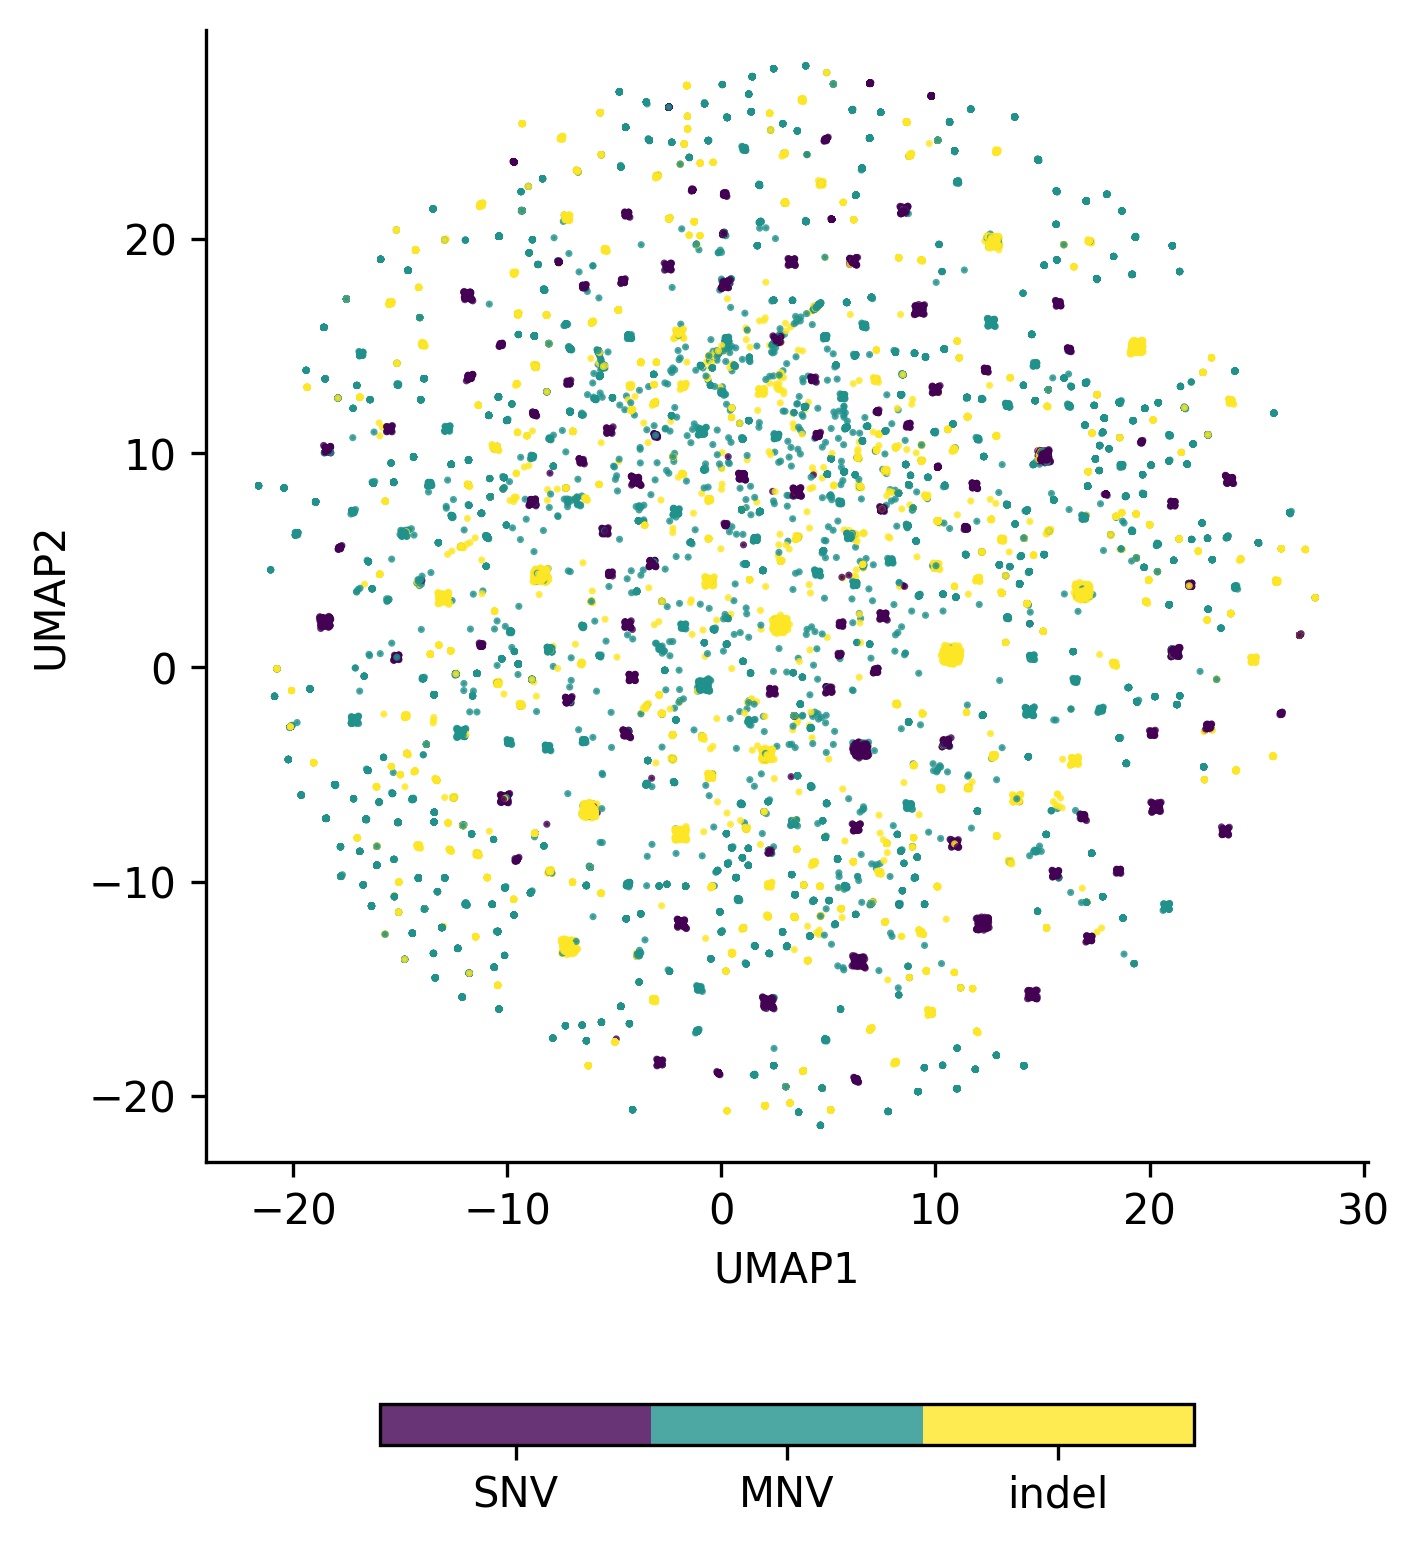

In [68]:
fig = plt.figure(figsize=(5,7), dpi=300)
ax = plt.subplot()
plt.scatter(embedding[:, 0], embedding[:, 1], c=mut_types, s=0.5, alpha=0.8)
plt.gca().set_aspect('equal', 'datalim')
cbar = plt.colorbar(boundaries=np.arange(4)-0.5, ticks = range(3), shrink=0.7 , orientation="horizontal") # horizontal colorbar
cbar.ax.set_xticklabels(['SNV', 'MNV', 'indel'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel('UMAP2')
plt.xlabel('UMAP1')
plt.savefig('../figures/data_UMAP/UMAP_token_emded_components_mutation_type_212215_mutations_final.png', format="png",bbox_inches='tight')
plt.show()

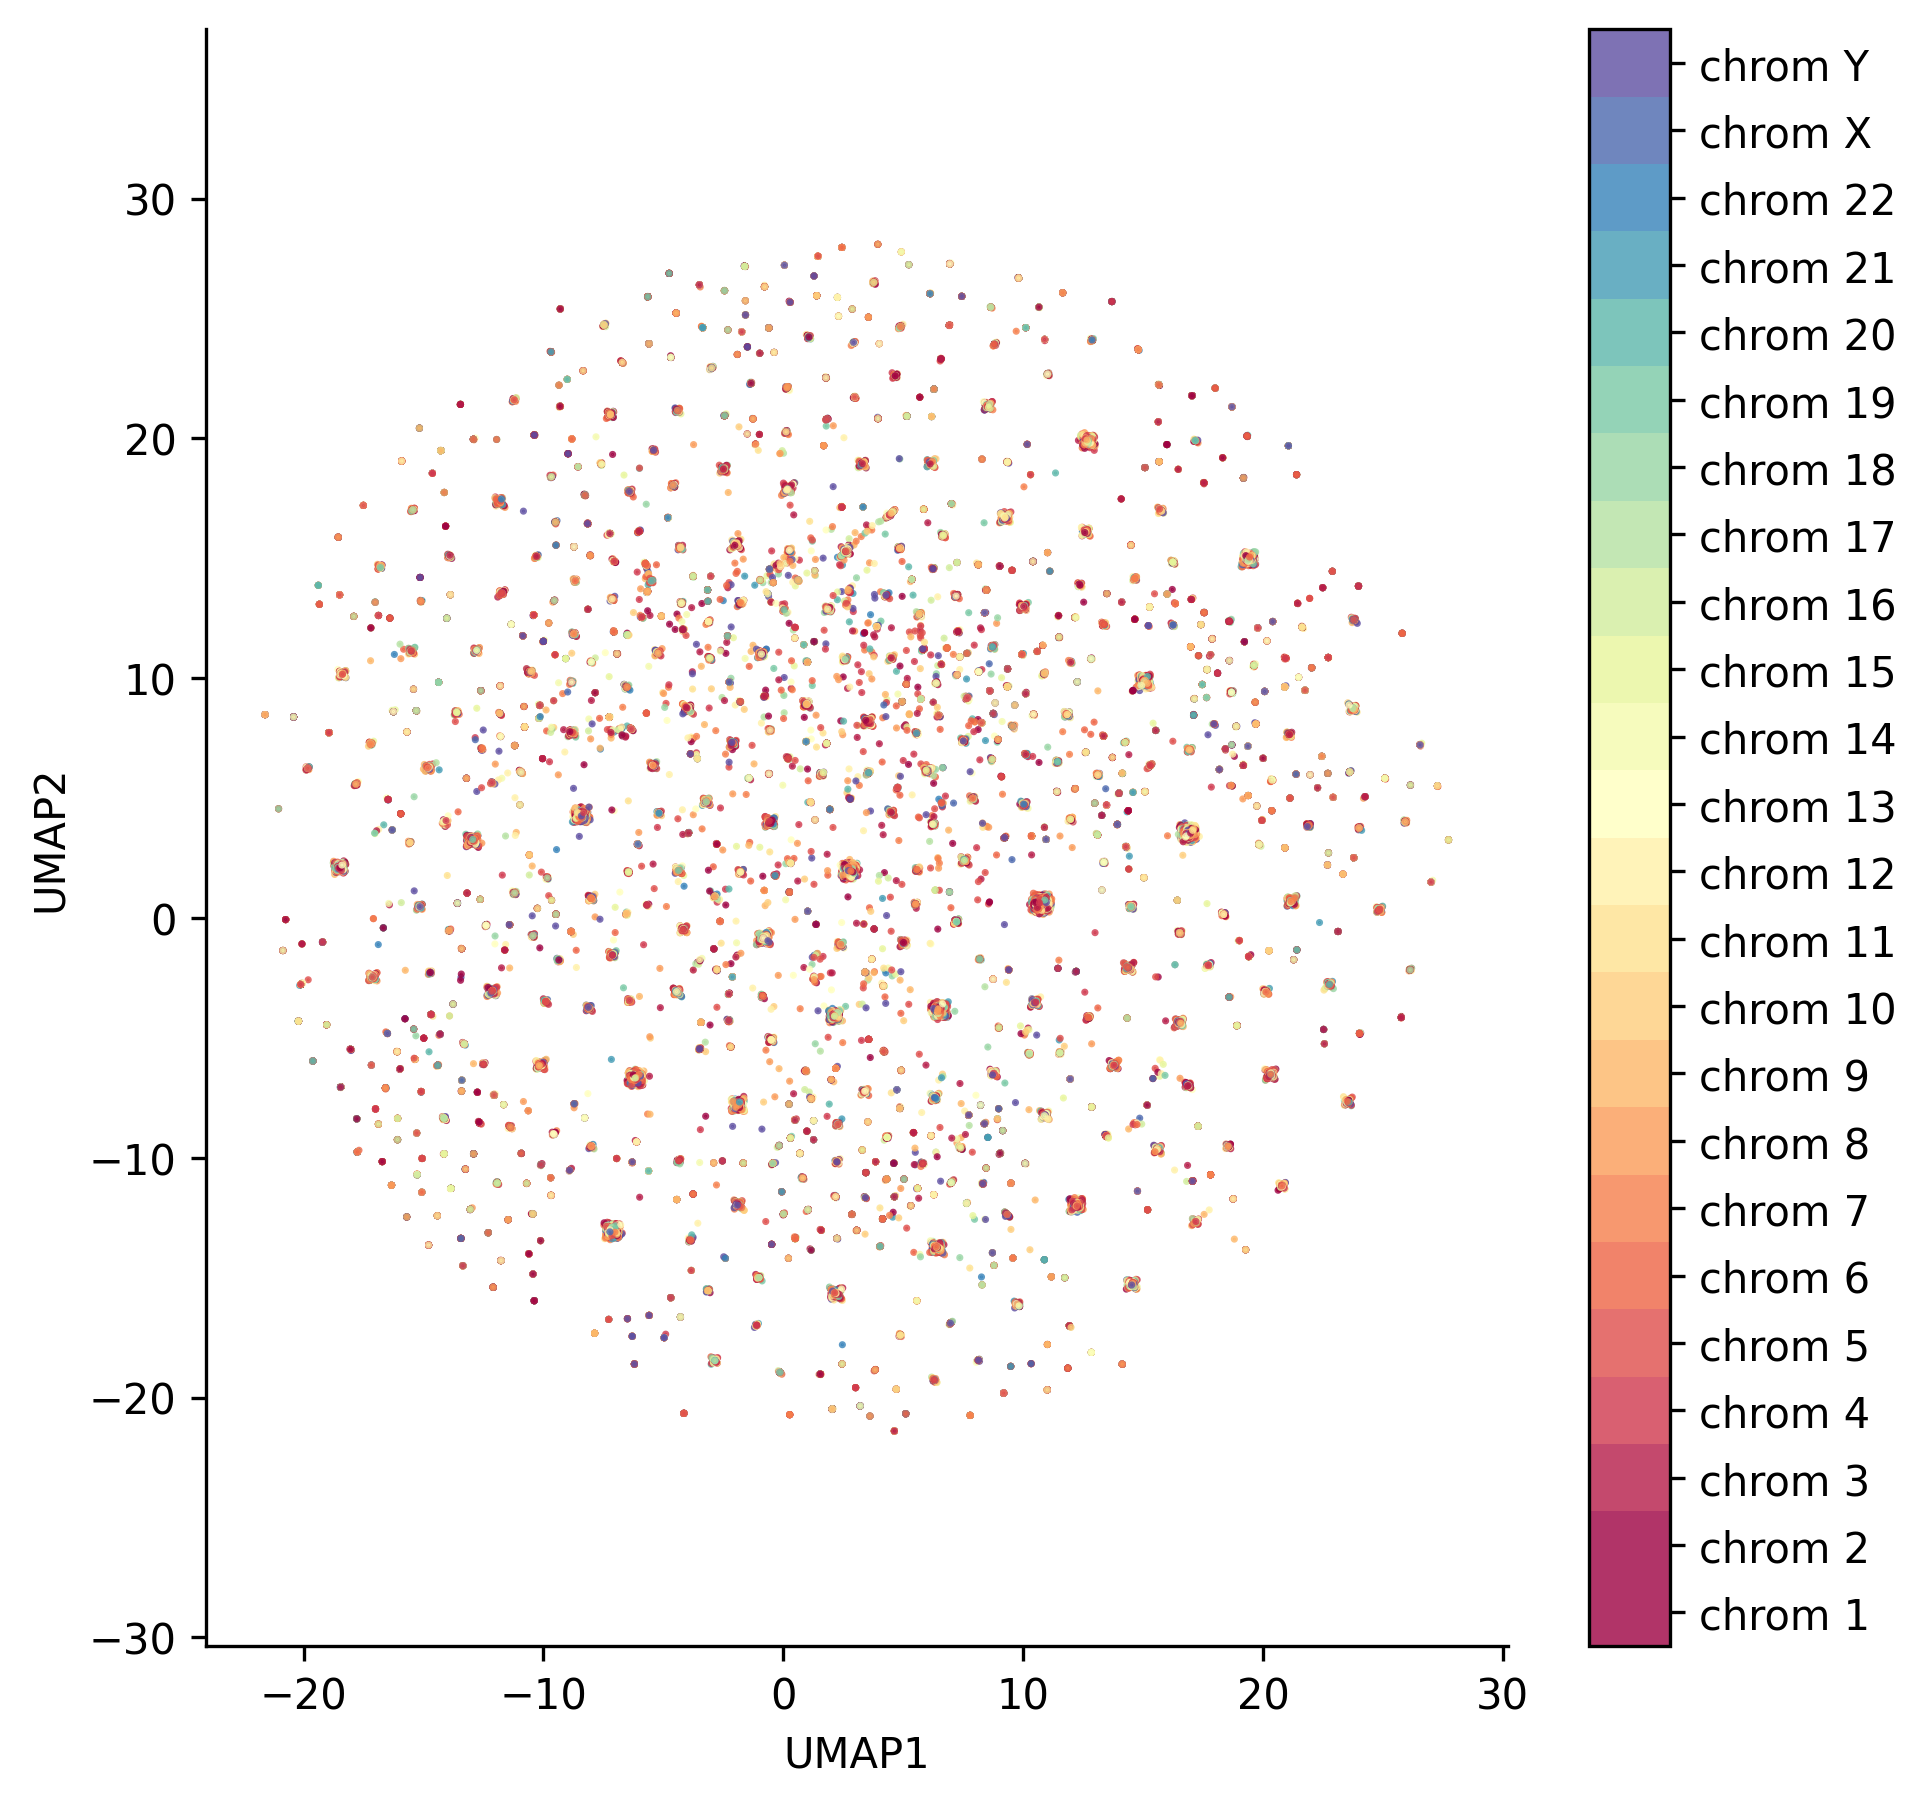

In [69]:
fig = plt.figure(figsize=(7,7), dpi=300)
ax = plt.subplot()
#plt.axes().set_facecolor("black")
plt.scatter(embedding[:, 0], embedding[:, 1], c=chrom_label, cmap='Spectral', s=0.5, alpha=0.8)
plt.gca().set_aspect('equal', 'datalim')
cbar = plt.colorbar(boundaries=np.arange(25)-0.5, ticks = range(24)) # horizontal colorbar
cbar.ax.set_yticklabels(chroms_base)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel('UMAP2')
plt.xlabel('UMAP1')
plt.savefig('../figures/data_UMAP/UMAP_token_emded_chromosome_212215_mutations_final.png', format="png",bbox_inches='tight')
plt.show()

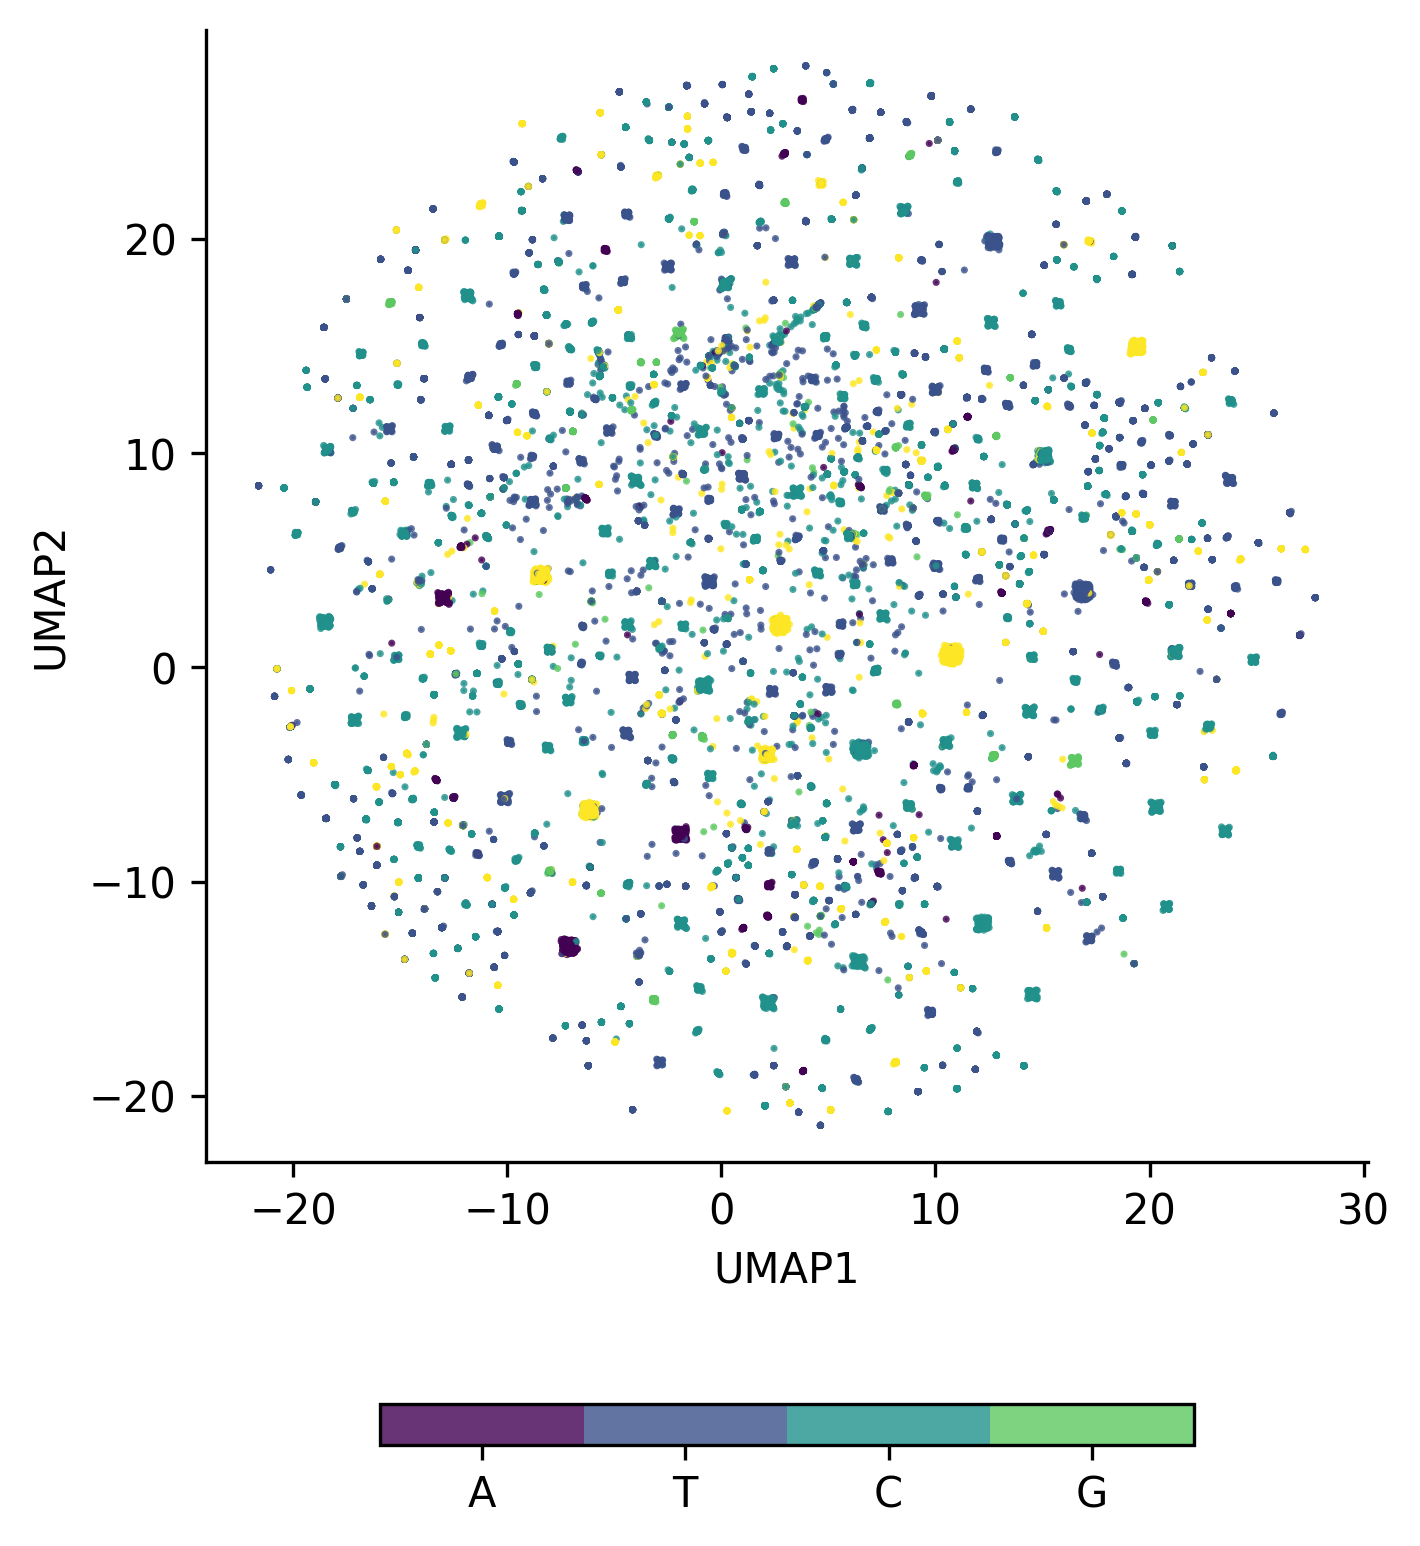

In [70]:
fig = plt.figure(figsize=(5,7), dpi=300)
ax = plt.subplot()
plt.scatter(embedding[:, 0], embedding[:, 1], c=middle_base, s=0.5, alpha=0.8)
plt.gca().set_aspect('equal', 'datalim')
cbar = plt.colorbar(boundaries=np.arange(5)-0.5, ticks = range(4), shrink=0.7 , orientation="horizontal") # horizontal colorbar
cbar.ax.set_xticklabels(['A', 'T', 'C', 'G'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel('UMAP2')
plt.xlabel('UMAP1')
plt.savefig('../figures/data_UMAP/UMAP_token_emded_ref_middle_base_212215_mutations_final.png', format="png",bbox_inches='tight')
plt.show()

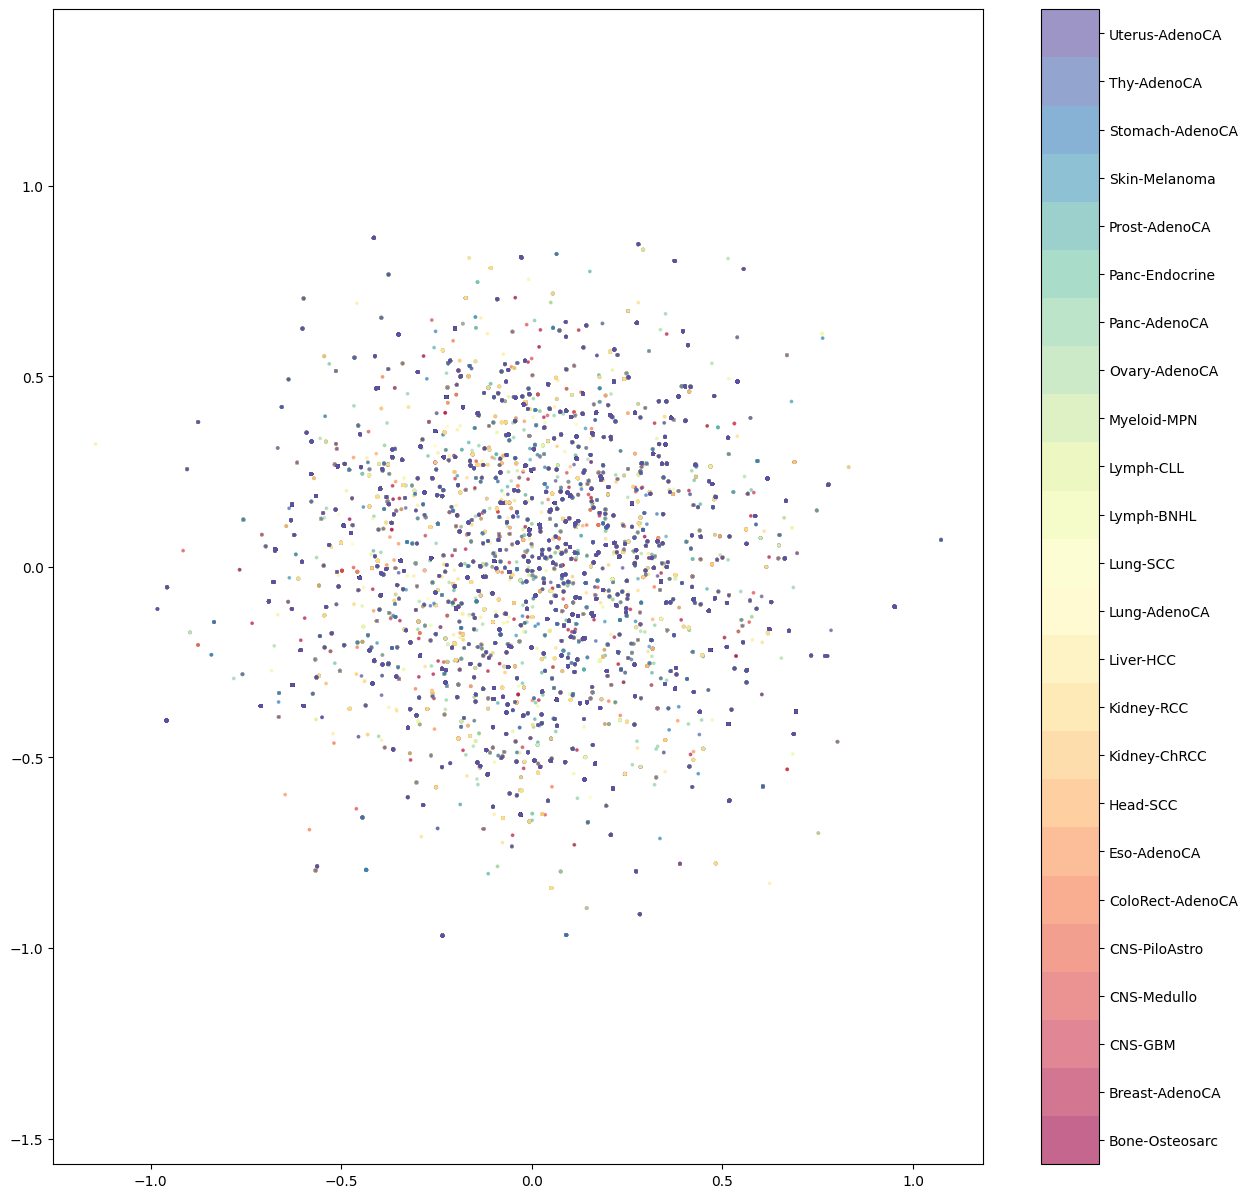

In [57]:
fig = plt.figure(figsize=(15,15))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=result.loc[:,'class_index'], cmap='Spectral', s=3, alpha=0.6)
plt.gca().set_aspect('equal', 'datalim')
cbar = plt.colorbar(boundaries=np.arange(25)-0.5, ticks = range(24)) # horizontal colorbar
cbar.ax.set_yticklabels(cancer.loc[:, 'class_name'].values.tolist())
#set_ytickslabels(cancer.loc[:, 'class_name'].values.tolist())#.cancer.loc[:, 'class_name'].values.tolist()
#plt.title('The first two PCA components', fontsize=24);
plt.savefig('PCA2_motif3_smaller.svg', format="svg",bbox_inches='tight')

## UMAP for Original MuAt embedding 

In [ ]:
from muat_models import MuAtMotif, get_model, ModelConfig
from utils import load_ckpt
import torch

### Testing how to load embedding layer for the function

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_config, model_state_dict, config, start_epoch, optimizer_satate_dict = load_ckpt('/csc/epitkane/projects/multimodal/models/MuAtMotif_orig/fold_10/BEST_MuAtMotif_orig_fold10.pth')
modelConfig = ModelConfig(**model_config)
model, pos, ges, one_hot = get_model('MuAtMotif', modelConfig)
model.load_state_dict(model_state_dict)
model.to(device)

In [ ]:
token_embedding = model.token_embedding

In [ ]:
test = torch.randint(0, 200, (10000, 1))

In [ ]:
A = token_embedding(test)

In [ ]:
A[0,0,:]

In [ ]:
df1 = pd.read_csv('/csc/epitkane/projects/multimodal/UMAP/df_train_data_PCA_motif3_UMAP_30_samples_each_file.tsv.gz', index_col= 0, sep='\t', compression='gzip')
df2 = df = pd.read_csv('/csc/epitkane/projects/multimodal/UMAP/df_train_data_muat_embed_token_UMAP_30_samples_each_file.tsv.gz', index_col= 0, sep='\t', compression='gzip')

In [ ]:
A = df1.loc[:, ['labels', 'chr', 'pos', 'mut_type', 'sample' ]]
B = df2.loc[:, ['labels', 'chr', 'pos', 'mut_type', 'sample' ]]

In [ ]:
A = A.sort_values(by = ['labels', 'sample', 'chr', 'pos'], ignore_index=True)

In [ ]:
B = B.sort_values(by = ['labels', 'sample', 'chr', 'pos'], ignore_index=True)

In [ ]:
A.compare(B)